In [303]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [304]:
dts = pd.read_csv("adult.csv")
dts.info()
dts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [305]:
ndts = dts.replace('?',np.NaN)
ndts= ndts.dropna()
ndts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


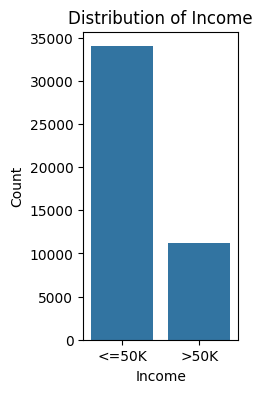

['<=50K' '>50K']


In [306]:
plt.figure(figsize=(2,4))
sns.countplot(data=ndts,x="income")
plt.title("Distribution of Income")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()
print(ndts['income'].unique())

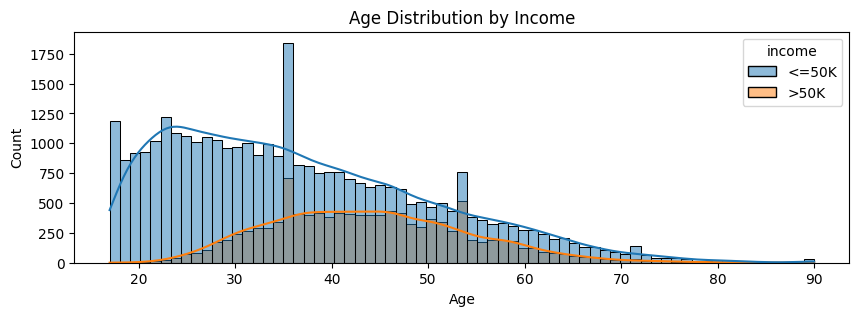

[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90]


In [307]:
plt.figure(figsize=(10,3))
sns.histplot(data=ndts,x="age",hue="income",kde=True,multiple="layer")
plt.title("Age Distribution by Income")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()
unique_age=ndts['age'].unique()
sorted_age=np.sort(unique_age) 
print(sorted_age)

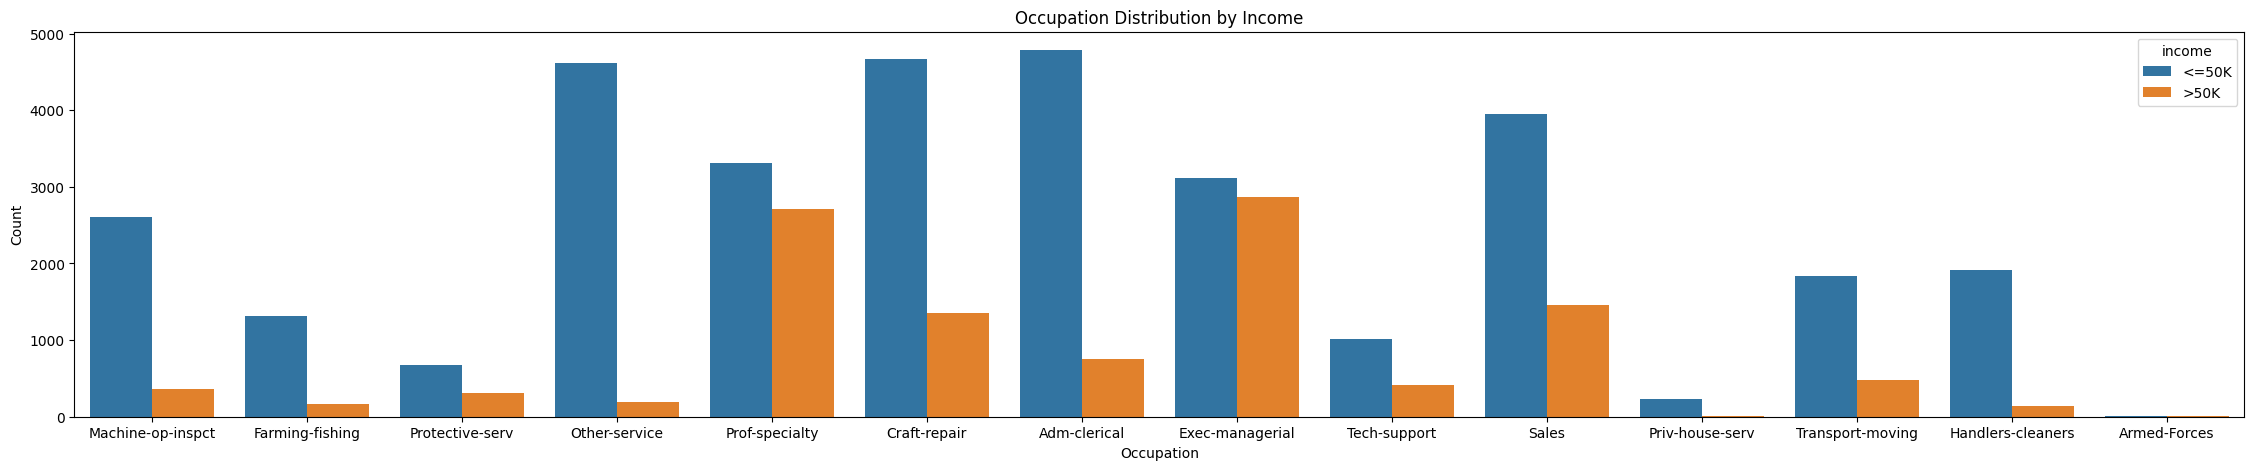

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


In [308]:
plt.figure(figsize=(28,5))
sns.countplot(data=ndts,x="occupation",hue="income")
plt.title("Occupation Distribution by Income")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()
print(ndts['occupation'].unique())

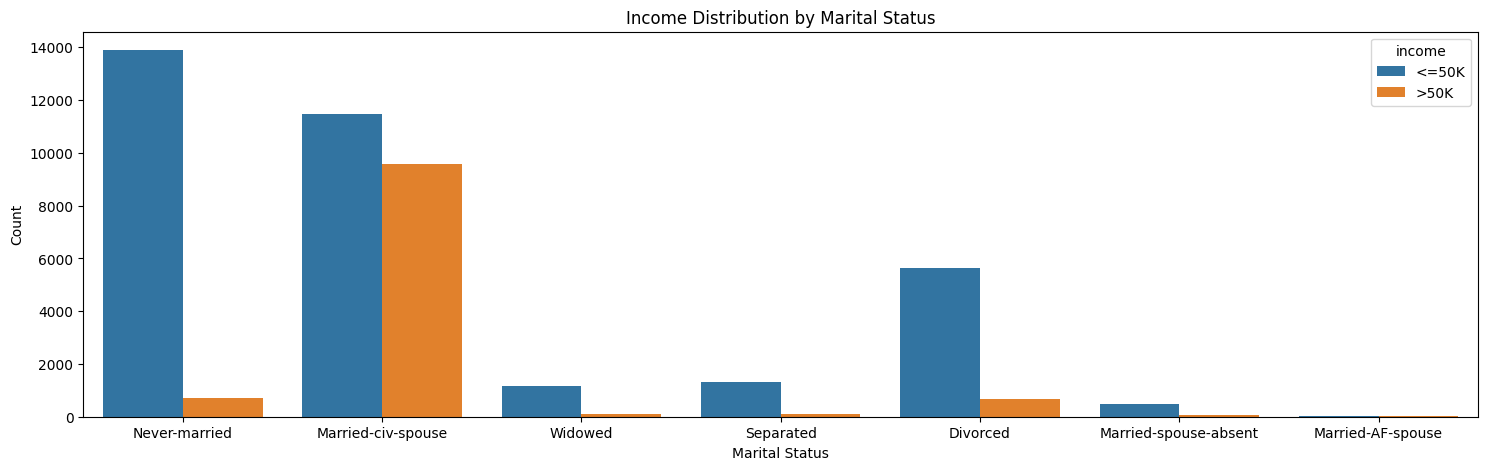

['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']


In [309]:
plt.figure(figsize=(18,5))
sns.countplot(data=ndts,x="marital-status",hue="income")
plt.title("Income Distribution by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()
print(ndts['marital-status'].unique())

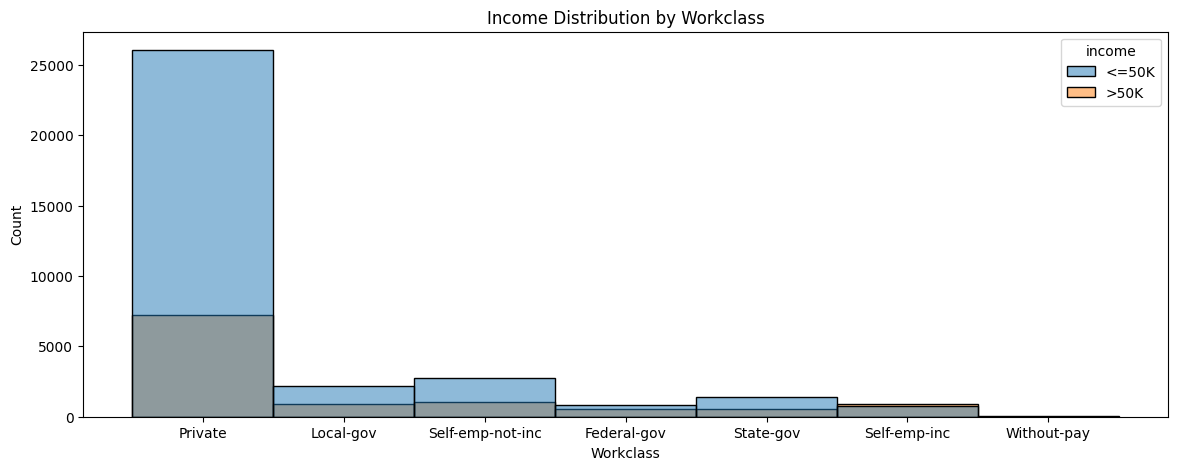

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']


In [310]:
plt.figure(figsize=(14,5))
sns.histplot(data=ndts,x="workclass",hue="income",multiple="layer")
plt.title("Income Distribution by Workclass")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()
print(ndts['workclass'].unique())

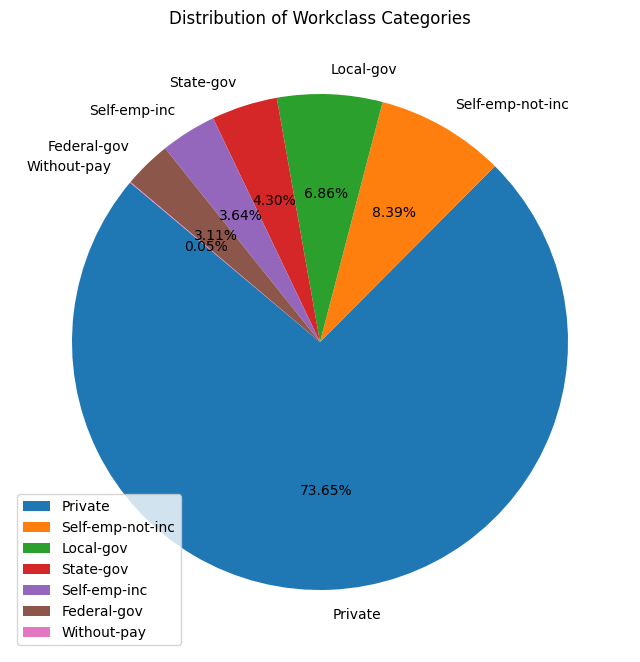

['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64


In [311]:
workclass_count = ndts['workclass'].value_counts()
labels = workclass_count.index
sizes = workclass_count.values
plt.figure(figsize=(8,14))
plt.pie(sizes,labels=labels,autopct='%1.2f%%',startangle=140)
plt.title("Distribution of Workclass Categories")
plt.legend()
plt.show()
print(ndts['workclass'].unique())
print(workclass_count)

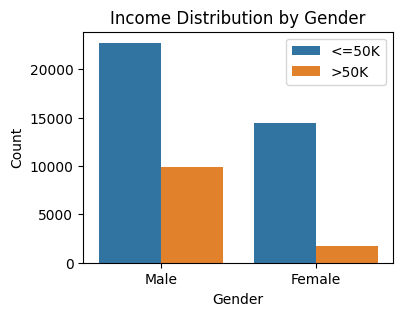

['Male' 'Female']


In [312]:
plt.figure(figsize=(4,3))
sns.countplot(data=dts,x="gender",hue="income")
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend()
plt.show()
print(ndts['gender'].unique())


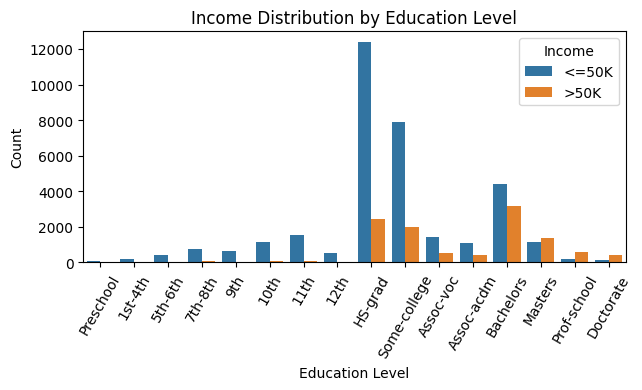

In [313]:
education_order = dts.sort_values('educational-num')['education'].unique()
plt.figure(figsize=(7,3))
sns.countplot(data=ndts,x="education",hue="income",order=education_order)
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.legend(title="Income")
plt.show()

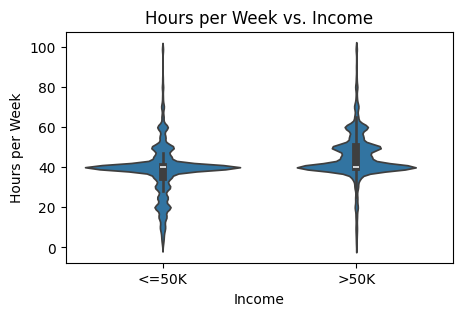

In [314]:
plt.figure(figsize=(5, 3))
sns.violinplot(data=dts, x="income", y="hours-per-week")
plt.title("Hours per Week vs. Income")
plt.xlabel("Income")
plt.ylabel("Hours per Week")
plt.show()

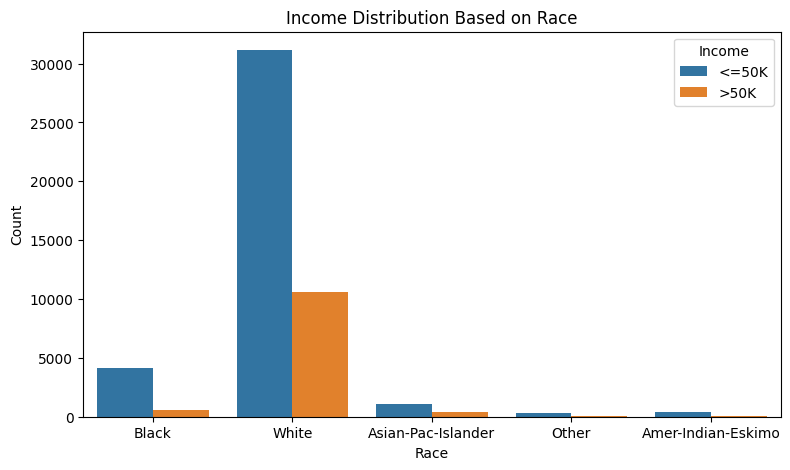

In [315]:
plt.figure(figsize=(9, 5))
sns.countplot(x='race', hue='income', data=dts)
plt.title('Income Distribution Based on Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Income')
plt.show()

In [316]:
workclass = pd.get_dummies(ndts["workclass"])
workclass.head()

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0
5,0,0,1,0,0,0,0


In [317]:
income = pd.get_dummies(ndts["income"])
income.head()

,<=50K,>50K
0,1,0
1,1,0
2,0,1
3,0,1
5,1,0


In [318]:
education = pd.get_dummies(ndts["education"])
education.head()

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [319]:
gender = pd.get_dummies(ndts["gender"])
gender.head()

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
5,0,1


In [320]:
maritalstatus = pd.get_dummies(ndts["marital-status"])
maritalstatus.head()

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0


In [321]:
nativecountry = pd.get_dummies(ndts["native-country"])
nativecountry.head()

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [322]:
race = pd.get_dummies(ndts["race"])
race.head()

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
5,0,0,0,0,1


In [323]:
relationship = pd.get_dummies(ndts["relationship"])
relationship.head()

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
5,0,1,0,0,0,0


In [324]:
occupation = pd.get_dummies(ndts["occupation"])
occupation.head()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [325]:
income = ndts.iloc[:,14].values
income
ndts.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [326]:
ndts.shape

(45222, 15)

In [327]:
demographics = ndts.iloc[:,[0,5,7,8,9,13]].values
demographics

array([[25, 'Never-married', 'Own-child', 'Black', 'Male',
        'United-States'],
       [38, 'Married-civ-spouse', 'Husband', 'White', 'Male',
        'United-States'],
       [28, 'Married-civ-spouse', 'Husband', 'White', 'Male',
        'United-States'],
       ...,
       [58, 'Widowed', 'Unmarried', 'White', 'Female', 'United-States'],
       [22, 'Never-married', 'Own-child', 'White', 'Male',
        'United-States'],
       [52, 'Married-civ-spouse', 'Wife', 'White', 'Female',
        'United-States']], dtype=object)

In [328]:
ndts.drop(["workclass", "education", "marital-status", "occupation", "relationship", "race", "native-country", "gender"], axis=1, inplace=True)
ndts = pd.concat([ndts, workclass, education, maritalstatus, occupation, relationship, race, nativecountry, gender], axis=1)


In [329]:
from sklearn.model_selection import train_test_split
X = ndts.drop(["income", "fnlwgt"], axis=1)
y = y = ndts["income"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [330]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [331]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())

y_pred = rf_model.predict(X_test)

rf_cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier Confusion Matrix :\n", rf_cm)

rf_acc = (rf_cm[0][0]+rf_cm[1][1])/rf_cm.sum()
print ("Accuracy Score according to Confusion Matrix:", rf_acc*100)


Random Forest Classifier Confusion Matrix :
 [[6246  553]
 [ 874 1372]]
Accuracy Score according to Confusion Matrix: 84.22332780541736


In [332]:
rf_predictions = rf_model.predict(X_test[0:15])

print("Using Random Forest Classifier")

print("Actual Income Categories (0: <=50K, 1: >50K):")
print(y_test[0:15])

print("Predicted Income Categories (0: <=50K, 1: >50K):")
print(rf_predictions)

Using Random Forest Classifier
Actual Income Categories (0: <=50K, 1: >50K):
43044    <=50K
39222    <=50K
4896     <=50K
4438     <=50K
45008    <=50K
8230      >50K
43640    <=50K
40851    <=50K
39317    <=50K
1598     <=50K
22440    <=50K
11328    <=50K
27227    <=50K
9110     <=50K
25753    <=50K
Name: income, dtype: object
Predicted Income Categories (0: <=50K, 1: >50K):
['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K']


In [333]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN Confusion Matrix:\n",cm_knn)

knn_acc = (cm_knn[0][0]+cm_knn[1][1])/cm_knn.sum()
print ("Accuracy Score according to KNN:", knn_acc*100)



KNN Confusion Matrix:
 [[6177  622]
 [ 965 1281]]
Accuracy Score according to KNN: 82.45439469320065


In [334]:
knn_predictions = knn_model.predict(X_test[0:15])

print("Using K- Nearest Neighbours")

print("Actual Income Categories (0: <=50K, 1: >50K):")
print(y_test[0:15])

print("Predicted Income Categories (0: <=50K, 1: >50K):")
print(knn_predictions)

Using K- Nearest Neighbours
Actual Income Categories (0: <=50K, 1: >50K):
43044    <=50K
39222    <=50K
4896     <=50K
4438     <=50K
45008    <=50K
8230      >50K
43640    <=50K
40851    <=50K
39317    <=50K
1598     <=50K
22440    <=50K
11328    <=50K
27227    <=50K
9110     <=50K
25753    <=50K
Name: income, dtype: object
Predicted Income Categories (0: <=50K, 1: >50K):
['>50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K']


In [335]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Confusion Matrix:\n",cm_dt)

dt_acc = (cm_dt[0][0]+cm_dt[1][1])/cm_dt.sum()
print ("Accuracy Score according to Decision Tree:", dt_acc*100)



Decision Tree Confusion Matrix:
 [[6070  729]
 [ 886 1360]]
Accuracy Score according to Decision Tree: 82.14483139856274


In [336]:
dt_predictions = dt_model.predict(X_test[0:15])

print("Using Decision Tree")

print("Actual Income Categories (0: <=50K, 1: >50K):")
print(y_test[0:15])

print("Predicted Income Categories (0: <=50K, 1: >50K):")
print(dt_predictions)

Using Decision Tree
Actual Income Categories (0: <=50K, 1: >50K):
43044    <=50K
39222    <=50K
4896     <=50K
4438     <=50K
45008    <=50K
8230      >50K
43640    <=50K
40851    <=50K
39317    <=50K
1598     <=50K
22440    <=50K
11328    <=50K
27227    <=50K
9110     <=50K
25753    <=50K
Name: income, dtype: object
Predicted Income Categories (0: <=50K, 1: >50K):
['>50K' '>50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '>50K']


In [337]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix:\n", cm_lr)

lr_acc = (cm_lr[0][0]+cm_lr[1][1])/cm_lr.sum()
print ("Accuracy Score according to Logistic Regression:", lr_acc*100)


Logistic Regression Confusion Matrix:
 [[6352  447]
 [ 901 1345]]
Accuracy Score according to Logistic Regression: 85.09673852957434


In [338]:
lr_predictions = lr_model.predict(X_test[0:20])

print("Using Logistic Regression")

print("Actual Income Categories (0: <=50K, 1: >50K):")
print(y_test[0:20])

print("Predicted Income Categories (0: <=50K, 1: >50K):")
print(lr_predictions)

Using Logistic Regression
Actual Income Categories (0: <=50K, 1: >50K):
43044    <=50K
39222    <=50K
4896     <=50K
4438     <=50K
45008    <=50K
8230      >50K
43640    <=50K
40851    <=50K
39317    <=50K
1598     <=50K
22440    <=50K
11328    <=50K
27227    <=50K
9110     <=50K
25753    <=50K
45558    <=50K
23769    <=50K
17542     >50K
29439    <=50K
23157     >50K
Name: income, dtype: object
Predicted Income Categories (0: <=50K, 1: >50K):
['<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K' '<=50K'
 '<=50K' '>50K']


In [339]:
cdts = dts.replace('?', np.NaN).dropna()
features = ["age", "workclass", "education", "marital-status", "race", "gender", "hours-per-week"]
target = "income"
pdts = cdts[features + [target]]

pdts = pd.concat([ndts, workclass, education, maritalstatus, race, gender], axis=1)

Xp = pdts.drop(["income", "fnlwgt"], axis=1)
yp = pdts["income"]
X_trainp, X_testp, y_trainp, y_testp = train_test_split(Xp, yp, test_size=0.2, random_state=10)

In [340]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainp = scaler.fit_transform(X_trainp)
X_testp = scaler.transform(X_testp)

In [341]:
from sklearn.linear_model import LogisticRegression
lrp_model = LogisticRegression()
lrp_model.fit(X_trainp, y_trainp)

y_pred_lrp = lrp_model.predict(X_testp)

cm_lrp = confusion_matrix(y_testp, y_pred_lrp)

lrp_acc = (cm_lrp[0][0]+cm_lrp[1][1])/cm_lrp.sum()
print ("Accuracy Score according to Decision Tree:", lrp_acc*100)

Accuracy Score according to Decision Tree: 85.09673852957434
